In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import os
from keras.applications import VGG16
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.regularizers import l2
from keras.models import Model

In [7]:
dataset_dir = r'E:\college\computer vision\case study\dataset\archive'

In [9]:
img_size = (224, 224)
batch_size = 32
num_classes = len(next(os.walk(dataset_dir))[1])  # Number of folders (i.e., categories)

# Data preprocessing with validation split
datagen = ImageDataGenerator(rescale=1./255,
                             validation_split=0.2,  # Split 20% of data for validation
                             rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True)

train_generator = datagen.flow_from_directory(dataset_dir,
                                              target_size=img_size,
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              subset='training')  # Training data

validation_generator = datagen.flow_from_directory(dataset_dir,
                                                   target_size=img_size,
                                                   batch_size=batch_size,
                                                   class_mode='categorical',
                                                   subset='validation')  # Validation data


Found 6795 images belonging to 13 classes.
Found 1693 images belonging to 13 classes.


In [5]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional base (pre-trained layers)
base_model.trainable = False

# Add custom layers on top of the base model
x = Flatten()(base_model.output)

# Add Dense layer with L2 regularization and Batch Normalization
x = Dense(256, activation='relu', kernel_regularizer=l2(0.001))(x)
x = BatchNormalization()(x)

# Add Dropout to reduce overfitting
x = Dropout(0.5)(x)

# Final output layer with softmax activation
x = Dense(13, activation='softmax', kernel_regularizer=l2(0.001))(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=x)

# Print the model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 13)             │         3,341 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 21,141,837 (80.65 MB)

 Trainable params: 6,426,637 (24.52 MB)

 Non-trainable params: 14,715,200 (56.13 MB)

In [13]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator)

Epoch 1/10


C:\Users\kollepallirishith\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


213/213 ━━━━━━━━━━━━━━━━━━━━ 572s 3s/step - accuracy: 0.4834 - loss: 1.6637 - val_accuracy: 0.5718 - val_loss: 1.3407
Epoch 2/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 576s 3s/step - accuracy: 0.8569 - loss: 0.5308 - val_accuracy: 0.6539 - val_loss: 1.1284
Epoch 3/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 570s 3s/step - accuracy: 0.9045 - loss: 0.3482 - val_accuracy: 0.6385 - val_loss: 1.1995
Epoch 4/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 586s 3s/step - accuracy: 0.9211 - loss: 0.2878 - val_accuracy: 0.6763 - val_loss: 1.1190
Epoch 5/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 569s 3s/step - accuracy: 0.9408 - loss: 0.2198 - val_accuracy: 0.6858 - val_loss: 1.0891
Epoch 6/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 569s 3s/step - accuracy: 0.9383 - loss: 0.2103 - val_accuracy: 0.7171 - val_loss: 0.9387
Epoch 7/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 568s 3s/step - accuracy: 0.9608 - loss: 0.1556 - val_accuracy: 0.7265 - val_loss: 0.9532
Epoch 8/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 565s 3s/step - accuracy: 0.9591 - loss: 0.1560 - val_accuracy: 0.721

In [15]:
 
# Evaluate the model
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')

53/53 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.7081 - loss: 0.9974
Validation Loss: 0.980208158493042, Validation Accuracy: 0.721204936504364


In [17]:
model.save('vgg16_image_recognition.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


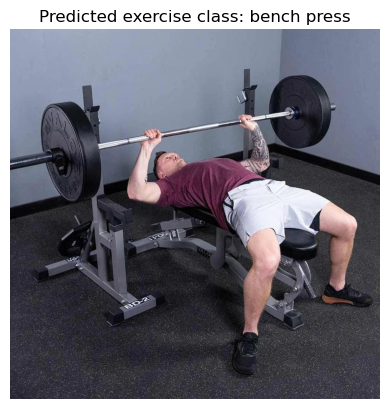

In [31]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load your pre-trained VGG16 model
model = load_model('vgg16_image_recognition.h5')

# Assuming your class labels are known (adjust this as per your dataset)
data_path = r'E:\college\computer vision\case study\dataset\archive'

labels = []
for folder in os.listdir(data_path):
    labels.append(folder)
labels.sort()
labels = labels[0:13]  # Limiting to 13 classes

label_encoder = LabelEncoder()
label_encoder.fit(labels)

# Function to preprocess the image
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))  # Resize to 224x224 for VGG16
    img = img.astype('float32') / 255.0  # Normalize the image
    img = np.expand_dims(img, axis=0)  # Add batch dimension (1, 224, 224, 3)
    return img

# Function to make a prediction and decode the result
def predict_custom_image(image_path, model, label_encoder):
    img = preprocess_image(image_path)
    prediction = model.predict(img)  # Predict the class
    predicted_class_index = np.argmax(prediction, axis=1)  # Get index of the highest probability class
    predicted_class = label_encoder.inverse_transform(predicted_class_index)  # Convert index back to label
    return predicted_class[0]

# Example usage
custom_image_path = r'E:\dataset\bench press\1.jpg'  # Path to your custom image
predicted_label = predict_custom_image(custom_image_path, model, label_encoder)

# Display the image and the predicted label
a = cv2.imread(custom_image_path)
plt.imshow(cv2.cvtColor(a, cv2.COLOR_BGR2RGB))  # Convert from BGR to RGB for proper display
plt.title(f'Predicted exercise class: {predicted_label}')
plt.axis('off')
plt.show()



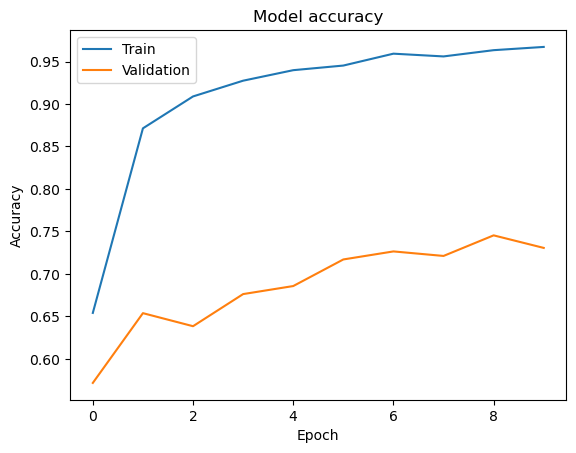

In [33]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'] )
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

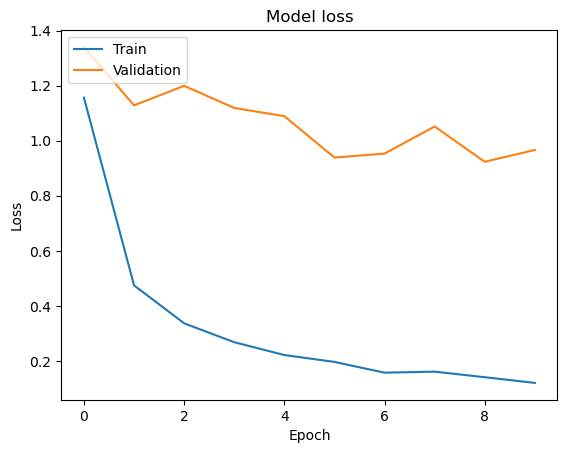

In [35]:

# Plot training & validation loss values
plt.plot(history.history['loss'] )
plt.plot(history.history['val_loss'] )
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


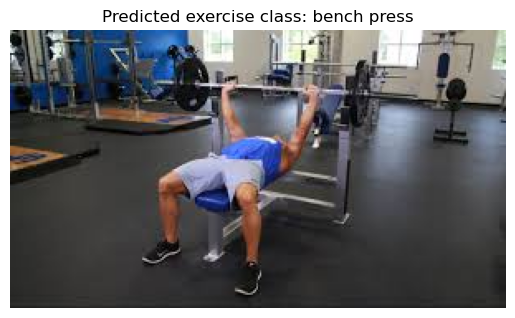

In [73]:
custom_image_path = r'E:\college\computer vision\case study\test images\bench1.jpeg'  # Path to your custom image
predicted_label = predict_custom_image(custom_image_path, model, label_encoder)
a = cv2.imread(custom_image_path)
plt.imshow(cv2.cvtColor(a, cv2.COLOR_BGR2RGB))  # Convert from BGR to RGB for proper display
plt.title(f'Predicted exercise class: {predicted_label}')
plt.axis('off')
plt.show()


In [9]:
import os
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Load the saved model
model = load_model('vgg16_image_recognition.h5')

# Recompile the model (ensure you specify the same optimizer and loss used during training)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Load your test data (assuming you have the same test dataset setup)
data_path = r'E:\college\computer vision\case study\dataset\archive'
images = []
image_labels = []

labels = []
for folder in os.listdir(data_path):
    labels.append(folder)
labels.sort()
labels = labels[0:13]  # Limiting to 13 classes

for label in labels:
    folder_path = os.path.join(data_path, label)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (224, 224))  # Resize to 224x224
        img = img.astype('float32') / 255.0  # Normalize
        images.append(img)
        image_labels.append(label)

# Convert to numpy arrays
images = np.array(images)
image_labels = np.array(image_labels)

# Encoding labels into integers
label_encoder = LabelEncoder()
image_labels_encoded = label_encoder.fit_transform(image_labels)

# Convert labels to categorical (one-hot encoding)
image_labels_encoded = to_categorical(image_labels_encoded, num_classes=len(labels))

# Use the same train-test split as before
trainX, testX, trainY, testY = train_test_split(images, image_labels_encoded, test_size=0.2, random_state=42)

# Evaluate the model on the test data (This step ensures metrics are built and avoids warnings)
loss, accuracy = model.evaluate(testX, testY)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")




54/54 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.9042 - loss: 0.3824
Test Loss: 0.39674264192581177
Test Accuracy: 0.901648998260498


54/54 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step


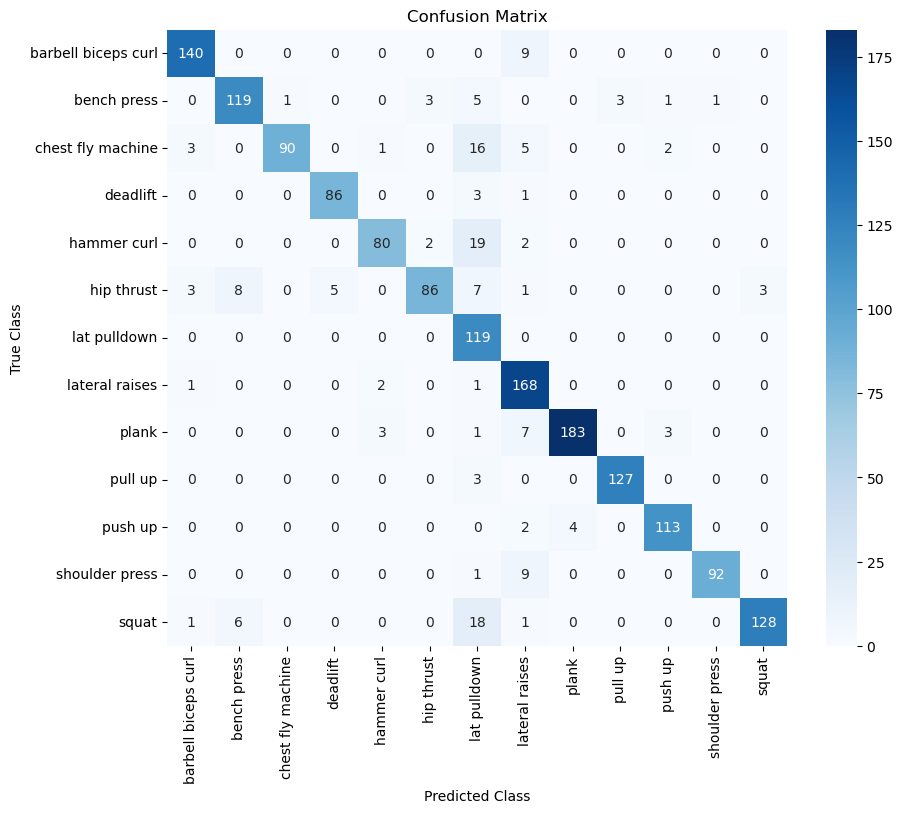

                     precision    recall  f1-score   support

barbell biceps curl       0.95      0.94      0.94       149
        bench press       0.89      0.89      0.89       133
  chest fly machine       0.99      0.77      0.87       117
           deadlift       0.95      0.96      0.95        90
        hammer curl       0.93      0.78      0.85       103
         hip thrust       0.95      0.76      0.84       113
       lat pulldown       0.62      1.00      0.76       119
     lateral raises       0.82      0.98      0.89       172
              plank       0.98      0.93      0.95       197
            pull up       0.98      0.98      0.98       130
            push up       0.95      0.95      0.95       119
     shoulder press       0.99      0.90      0.94       102
              squat       0.98      0.83      0.90       154

           accuracy                           0.90      1698
          macro avg       0.92      0.90      0.90      1698
       weighted avg   

In [11]:
# Predict class probabilities for the test set
test_predictions = model.predict(testX)

# Convert probabilities to class labels
test_pred_labels = np.argmax(test_predictions, axis=1)
true_labels = np.argmax(testY, axis=1)  # Get true class labels from one-hot encoding

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, test_pred_labels)

# Plot confusion matrix using seaborn for better visualization
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

# Classification report for precision, recall, and F1-score
print(classification_report(true_labels, test_pred_labels, target_names=label_encoder.classes_))